In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.signal import stft
import pywt

In [8]:
def temporal_kurtosis(signal, fs, window_size_sec=0.1, overlap=0.5):
    step = int(window_size_sec * fs * (1 - overlap))
    win_len = int(window_size_sec * fs)
    kurtosis_vals = []
    times = []

    for i in range(0, len(signal) - win_len, step):
        window = signal[i:i + win_len]
        k = kurtosis(window, fisher=False)
        kurtosis_vals.append(k)
        times.append(i / fs)

    plt.figure(figsize=(10, 4))
    plt.plot(times, kurtosis_vals, marker='o')
    plt.title("Kurtosis temporal por ventana")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Kurtosis")
    plt.grid(True)
    plt.show()

In [12]:
def spectral_kurtosis_stft(signal, fs, nperseg=256, noverlap=128):
    f, t, Zxx = stft(signal, fs=fs, nperseg=nperseg, noverlap=noverlap)
    sk = []

    for i in range(Zxx.shape[0]):
        mag = np.abs(Zxx[i, :])
        k = kurtosis(mag, fisher=False)
        sk.append(k)

    plt.figure(figsize=(10, 4))
    plt.plot(f, sk)
    plt.title("Kurtosis espectral (STFT)")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Kurtosis")
    plt.grid(True)
    plt.show()

def spectral_kurtosis_wavelet(signal, wavelet='db4', maxlevel=4):
    wp = pywt.WaveletPacket(data=signal, wavelet=wavelet, mode='symmetric', maxlevel=maxlevel)
    nodes = wp.get_level(maxlevel, order='freq')
    freqs = [node.path for node in nodes]
    values = [kurtosis(node.data, fisher=False) for node in nodes]

    plt.figure(figsize=(10, 4))
    plt.bar(freqs, values)
    plt.title(f"Kurtosis espectral (Wavelet - nivel {maxlevel})")
    plt.xlabel("Subbandas")
    plt.ylabel("Kurtosis")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

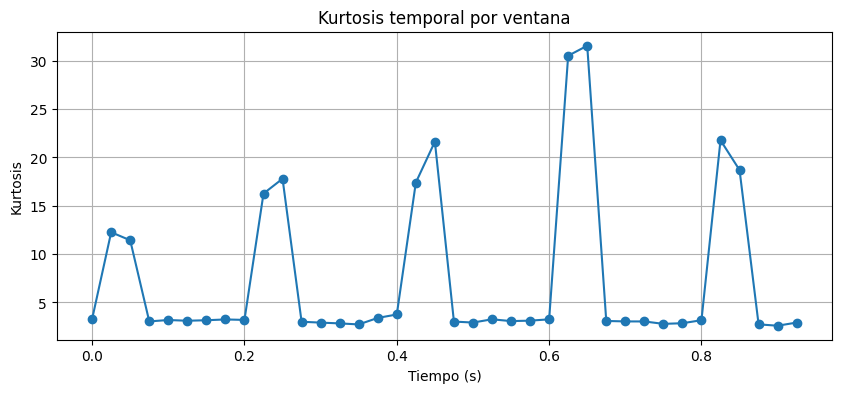

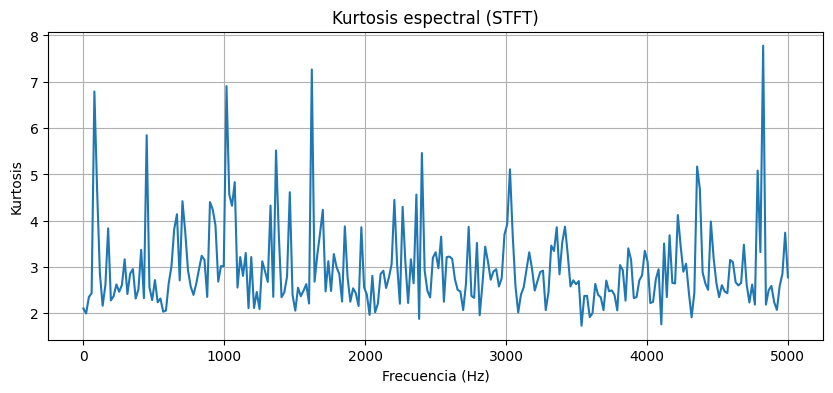

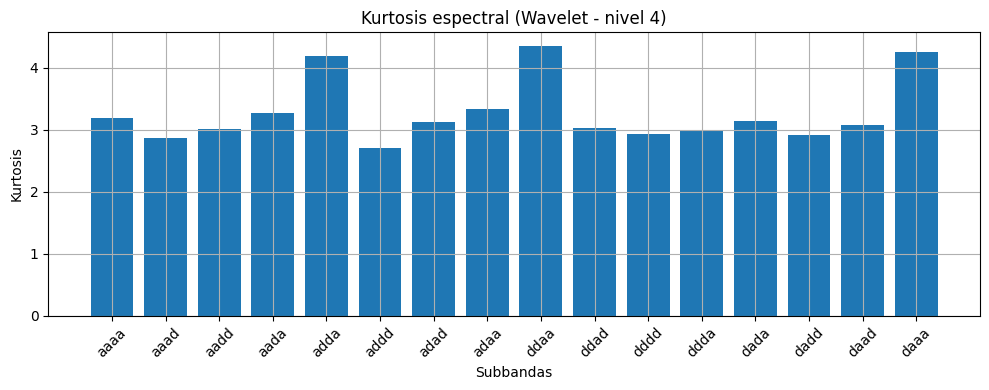

In [28]:
if __name__ == "__main__":
    fs = 10000  # Hz
    t = np.linspace(0, 1, fs, endpoint=False)
    noise = np.random.normal(0, 1, fs)
    impulse = np.zeros(fs)
    impulse[500::2000] = 10
    signal = noise + impulse

    temporal_kurtosis(signal, fs, window_size_sec=0.05, overlap=0.5)
    spectral_kurtosis_stft(signal, fs, nperseg=512, noverlap=256)
    spectral_kurtosis_wavelet(signal, wavelet='db4', maxlevel=4)

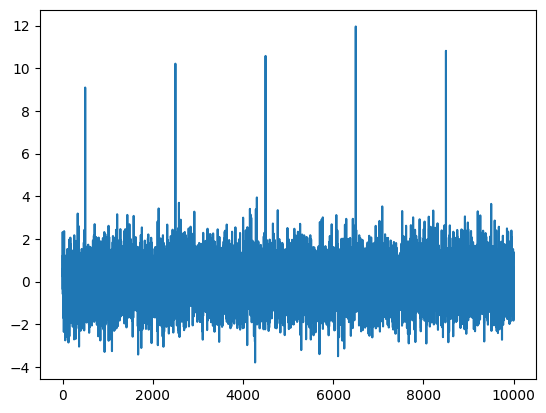

In [29]:
plt.plot(signal)